In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * output.grad      
            other.grad += 1.0 * output.grad     

        output._backward = _backward
        return output

    def __mul__(self, other):
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad   
            other.grad += self.data * output.grad   

        output._backward = _backward
        return output

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad += (1 - np.tanh(self.data)**2 ) * output.grad 

        output._backward = _backward
        return output

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [3]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.prev :
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n.op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n.op, label = n.op)
            # and connect this node to it
            dot.edge(uid + n.op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2.op)

    return dot

In [4]:
#a = Value(2.0)
#a+1

In [5]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        if isinstance(other, Value):       ###
            other = other                  ###
        else:                              ###
            other = Value(other)           ###
        
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * output.grad
            other.grad += 1.0 * output.grad

        output._backward = _backward
        return output

    def __mul__(self, other):
        if isinstance(other, Value):     ###
            other = other                ###
        else:                            ###
            other = Value(other)         ###
            
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad
            other.grad += self.data * output.grad

        output._backward = _backward
        return output

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad += (1 - np.tanh(self.data)**2 ) * output.grad

        output._backward = _backward
        return output

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [6]:
a = Value(-2.0, label = 'a')
a + 1

Value(data=-1.0)

In [7]:
a * 2 # a.__mul__(2)

Value(data=-4.0)

In [8]:
# 2 * a  # 2.__mul__(a)

In [9]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        if isinstance(other, Value):
            other = other 
        else:
            other = Value(other) 
        
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * output.grad
            other.grad += 1.0 * output.grad

        output._backward = _backward
        return output

    def __radd__(self, other): # other + self       ###
        return self + other                         ###

    def __mul__(self, other):
        if isinstance(other, Value):
            other = other 
        else:
            other = Value(other) 
            
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad
            other.grad += self.data * output.grad

        output._backward = _backward
        return output

    def __rmul__(self, other): # other * self    ###
        return self * other                      ###

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad += (1 - np.tanh(self.data)**2 ) * output.grad

        output._backward = _backward
        return output

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [10]:
a = Value(-2.0, label = 'a')
1 + a

Value(data=-1.0)

In [11]:
2 * a

Value(data=-4.0)

In [12]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        if isinstance(other, Value):
            other = other 
        else:
            other = Value(other) 
        
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * output.grad
            other.grad += 1.0 * output.grad

        output._backward = _backward
        return output

    def __radd__(self, other): # other + self
        return self + other

    def __mul__(self, other):
        if isinstance(other, Value):
            other = other 
        else:
            other = Value(other) 
            
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad
            other.grad += self.data * output.grad

        output._backward = _backward
        return output

    def __rmul__(self, other): # other * self
        return self * other

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad += (1 - np.tanh(self.data)**2 ) * output.grad

        output._backward = _backward
        return output

    def exp(self): ## e^x                                      ###
        output = Value(math.exp(self.data), (self, ), 'exp')   ###

        def _backward(): ## de^x/dx = e^x                      ###
            self.grad += output.data * output.grad             ###

        output._backward = _backward                           ###
        return output                                          ###

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [13]:
a = Value(2.0)
a.exp()

Value(data=7.38905609893065)

In [14]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        if isinstance(other, Value):
            other = other 
        else:
            other = Value(other) 
        
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * output.grad
            other.grad += 1.0 * output.grad

        output._backward = _backward
        return output

    def __radd__(self, other): # other + self
        return self + other

    def __mul__(self, other):
        if isinstance(other, Value):
            other = other 
        else:
            other = Value(other) 
            
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad
            other.grad += self.data * output.grad

        output._backward = _backward
        return output

    def __rmul__(self, other): # other * self
        return self * other

    def __pow__(self, other):                                          ###
        
        output = Value(self.data**other, (self, ), f'**{other}')       ###

        def _backward():                                               ###
            self.grad += other * self.data**(other-1) * output.grad    ###

        output._backward = _backward                                   ###
        return output                                                  ###
        

    def __truediv__(self, other): # self / other                       ###
        return self * other**-1                                        ###

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad += (1 - np.tanh(self.data)**2 ) * output.grad

        output._backward = _backward
        return output

    def exp(self):
        output = Value(math.exp(self.data), (self, ), 'exp')

        def _backward():
            self.grad += output.data * output.grad

        output._backward = _backward
        return output

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [15]:
a = Value(2.0)
b = Value(4.0)
a / b

Value(data=0.5)

In [16]:
a**2

Value(data=4.0)

In [17]:
a * b**-1

Value(data=0.5)

In [18]:
class Value:

    def __init__(self, x, children=(), operation='', label=''):
        self.data = x
        self.prev = children
        self.op = operation
        self.label = label
        self.grad = 0.0
        self._backward = lambda: None

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        if isinstance(other, Value):
            other = other 
        else:
            other = Value(other) 
        
        output = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * output.grad
            other.grad += 1.0 * output.grad

        output._backward = _backward
        return output

    def __radd__(self, other): # other + self
        return self + other

    def __mul__(self, other):
        if isinstance(other, Value):
            other = other 
        else:
            other = Value(other) 
            
        output = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad += other.data * output.grad
            other.grad += self.data * output.grad

        output._backward = _backward
        return output

    def __rmul__(self, other): # other * self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float))
        output = Value(self.data**other, (self, ), f'**{other}')

        def _backward():
            self.grad += other * self.data**(other-1) * output.grad

        output._backward = _backward
        return output
        
    def __truediv__(self, other): # self / other
        return self * other**-1

    def __neg__(self):              ###
        return self * -1            ###

    def __sub__(self, other):       ###
        return self + (-other)      ###

    def tanh(self):
        output = Value(np.tanh(self.data), (self, ), 'tanh')

        def _backward():
            self.grad += (1 - np.tanh(self.data)**2 ) * output.grad

        output._backward = _backward
        return output

    def exp(self):
        output = Value(math.exp(self.data), (self, ), 'exp')

        def _backward():
            self.grad += output.data * output.grad

        output._backward = _backward
        return output

    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v.prev:
                    build_topo(child)
                topo.append(v)
        
        build_topo(self)
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()

In [19]:
a = Value(2.0)
b = Value(4.0)
a - b

Value(data=-2.0)

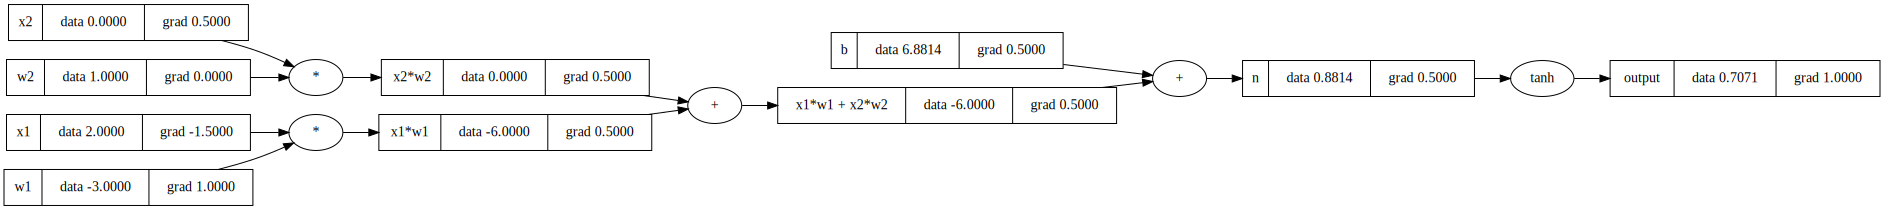

In [20]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

# tanh(n)
o = n.tanh(); o.label = 'output'

o.backward()
draw_dot(o)

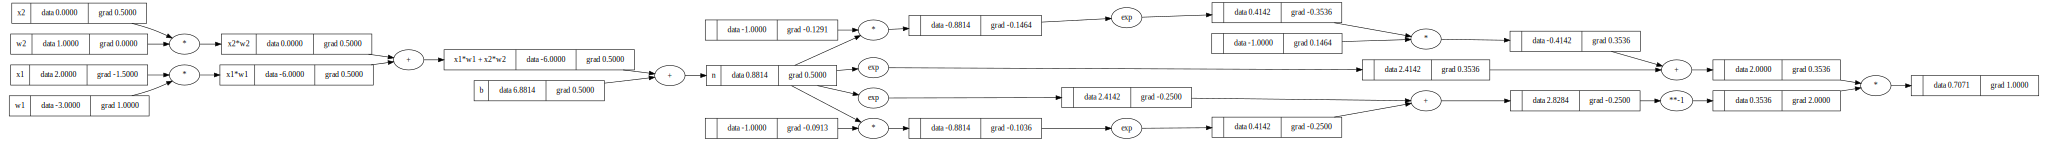

In [21]:
#inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b  
a1 = x1 * w1; a1.label = 'x1*w1'
a2 = x2 * w2; a2.label = 'x2*w2'
s = a1 + a2; s.label = 'x1*w1 + x2*w2'
n = s + b; n.label = 'n'

# tanh(n)
o = (n.exp() - (-n).exp()) / (n.exp() + (-n).exp())

o.backward()
draw_dot(o)

In [22]:
import torch

In [23]:
torch.tensor([[1, 2, 3],[4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [24]:
torch.tensor([[1, 2, 3],[4, 5, 6]]).shape

torch.Size([2, 3])

In [25]:
torch.tensor([2.0])

tensor([2.])

In [26]:
torch.tensor([2.0]).shape

torch.Size([1])

In [27]:
x1 = torch.Tensor([2.0])                ; x1.requires_grad = True
x2 = torch.Tensor([0.0])                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0])               ; w1.requires_grad = True
w2 = torch.Tensor([1.0])                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432])  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071067094802856
---
x2 0.5000001192092896
w2 0.0
x1 -1.5000003576278687
w1 1.000000238418579


In [28]:
class Neuron:
    
    def __init__(self, nin):
        # l = []
        # for _ in range(nin):
        #     l.append( Value( random.uniform(-1,1) ) )
        # self.w = l
        
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
      

In [29]:
n = Neuron(2)
n

In [30]:
class Neuron:
    
    def __init__(self, nin):
        
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
        
    def __call__(self, x): #forward pass                           ###
        # w * x + b
        return sum(wi*xi for wi, xi in zip(self.w, x)) + self.b    ###
        

In [31]:
n = Neuron(2)
x = [2.0, 3.0]
n(x)

Value(data=-1.1702634529789218)

In [32]:
class Neuron:
    
    def __init__(self, nin):
        
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
        
    # forward pass
    def __call__(self, x):                                       ###
        # tanh(w * x + b)
        s = sum(wi*xi for wi, xi in zip(self.w, x)) + self.b     ###
        return s.tanh()                                          ###

In [33]:
n = Neuron(3)
x = [2.0, 3.0, 4.0]
n(x)

Value(data=-0.7647492243634336)

In [34]:
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
  
    # Forward pass
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
      
        if(len(outs) == 1):
            return outs[0] 
        else: 
            return  outs
        #return outs[0] if len(outs) == 1 else outs

In [35]:
x = [2.0, 3.0, 4.0]
l = Layer(3, 4)
l(x)

[Value(data=-0.948473283688983),
 Value(data=-0.9098244089528523),
 Value(data=-0.999924410444844),
 Value(data=0.9998214348745356)]

In [36]:
class MLP:
    
    #MLP(3, [4, 4, 1])
    def __init__(self, nin, nouts):
        sizes = [nin] + nouts # size = [3, 4, 4, 1]
        self.layers = [Layer(sizes[i], sizes[i+1]) for i in range(len(nouts))] #nout = [4, 4, 1] # len(nouts)=3
  
    # forward pass
    def __call__(self, x):  
        for layer in self.layers:
            x = layer(x)  
            
        return x

In [37]:
x = [2.0, 3.0, 4.0]
nn = MLP(3, [4, 4, 1])
nn(x)

Value(data=-0.6776227848222073)

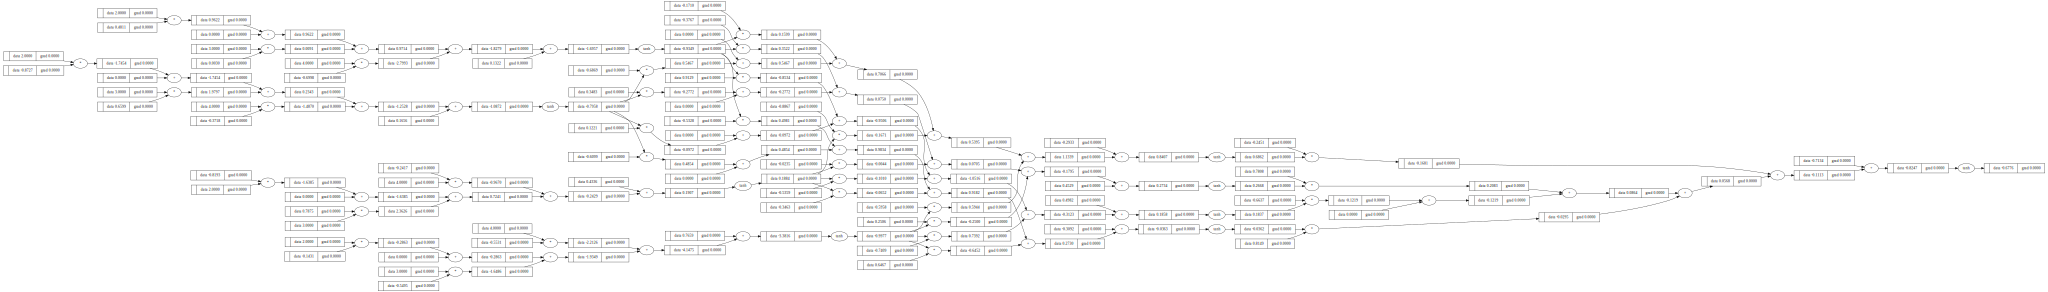

In [38]:
draw_dot(nn(x))

In [39]:
nn = MLP(3, [4, 4, 1])
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [0.5, -0.5, -0.5, 0.5] # desired targets

In [40]:
ypreds=[]
for x in xs:
    ypreds.append(nn(x))
ypreds

[Value(data=0.6431789013941512),
 Value(data=0.34261851409262867),
 Value(data=0.6596645242716004),
 Value(data=0.3947927042226794)]

In [41]:
ypreds = [nn(x) for x in xs]
ypreds

[Value(data=0.6431789013941512),
 Value(data=0.34261851409262867),
 Value(data=0.6596645242716004),
 Value(data=0.3947927042226794)]

In [42]:
[(ypred - y)**2 for y, ypred in zip(ys, ypreds)]

[Value(data=0.02050019780443608),
 Value(data=0.7100059602916694),
 Value(data=1.3448218088540773),
 Value(data=0.011068575084776615)]

In [43]:
loss = sum((ypred - y)**2 for y, ypred in zip(ys, ypreds))
loss

Value(data=2.0863965420349593)

In [44]:
loss.backward()

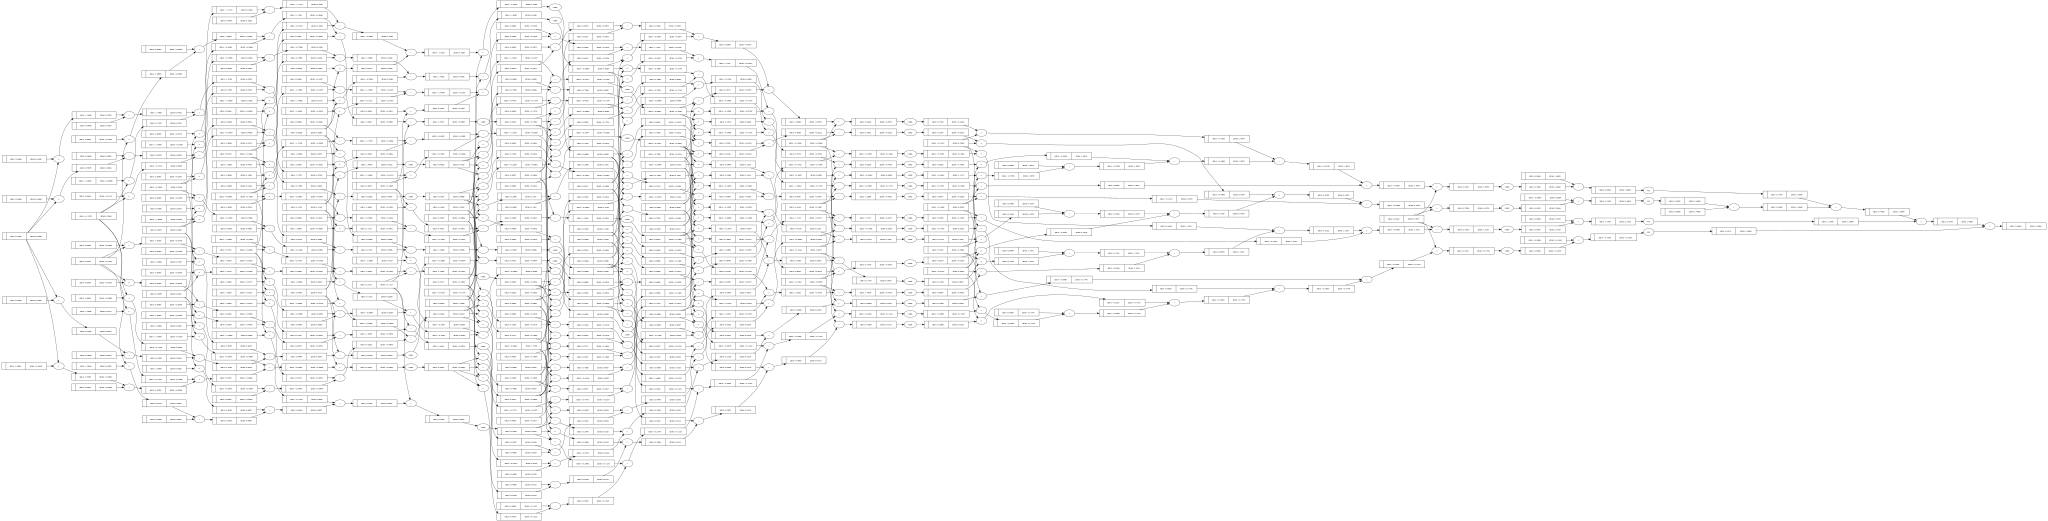

In [45]:
draw_dot(loss)

In [46]:
class Neuron:
    
    def __init__(self, nin):
        
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))
        
    def __call__(self, x):
        # w * x + b
        return (sum(wi*xi for wi, xi in zip(self.w, x)) + self.b).tanh()

    def parameters(self):                        ###
        return self.w + [self.b]                 ###

In [47]:
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
  
    # Forward pass
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        
        return outs[0] if len(outs) == 1 else outs

    def parameters(self):                                      ###
        #params=[]
        #for neuron in self.neurons:
        #    params.extend(neuron.parameters())
        #return params
        return [p for neuron in self.neurons for p in neuron.parameters()] ####
        

In [48]:
class MLP:
    
    def __init__(self, nin, nouts):
        sizes = [nin] + nouts
        self.layers = [Layer(sizes[i], sizes[i+1]) for i in range(len(nouts))] #nout = [4, 4, 1] # len(nouts)=3
  
    # forward pass
    def __call__(self, x):  
        for layer in self.layers:
            x = layer(x)      
        return x

    def parameters(self):                                                       ###
        return [p for layer in self.layers for p in layer.parameters()]         ###
        

In [49]:
x = [2.0, 3.0, 4.0]
nn = MLP(3, [4, 4, 1])
nn(x)

Value(data=0.14048511898658755)

In [50]:
nn.parameters()

[Value(data=0.6815921209530273),
 Value(data=-0.0578750284209435),
 Value(data=-0.5576060797554341),
 Value(data=0.9150854264501231),
 Value(data=0.6405329127964314),
 Value(data=-0.5043207745274989),
 Value(data=0.7445268232022213),
 Value(data=0.37171419043398024),
 Value(data=0.8008150311540845),
 Value(data=-0.0061791848454026965),
 Value(data=0.2435678985663321),
 Value(data=-0.38700805852459563),
 Value(data=-0.4628547210207159),
 Value(data=0.6183592052255849),
 Value(data=0.8168346611455051),
 Value(data=0.5789026048058104),
 Value(data=0.568962373488151),
 Value(data=-0.9344409896558541),
 Value(data=0.725970803253202),
 Value(data=0.8888568629542137),
 Value(data=0.7262129213599207),
 Value(data=-0.8862291432608391),
 Value(data=0.056003149592576795),
 Value(data=0.21342951001227206),
 Value(data=0.9054763035125089),
 Value(data=0.4836660029801796),
 Value(data=0.5540457080601282),
 Value(data=0.9531448486444936),
 Value(data=-0.9637247453254321),
 Value(data=0.11506875311019

In [51]:
len(nn.parameters())

41

In [52]:
nn = MLP(3, [4, 4, 1])
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [0.5, -0.5, -0.5, 0.5] # desired targets

In [53]:
ypreds = [nn(x) for x in xs]
ypreds

[Value(data=0.3399165663963979),
 Value(data=0.48158816750001665),
 Value(data=-0.09818487921813927),
 Value(data=0.4834755124424231)]

In [54]:
loss = sum((ypred - y)**2 for y, ypred in zip(ys, ypreds))
loss

Value(data=1.1508704862683414)

In [55]:
loss.backward()

In [56]:
for p in nn.parameters():
    p.data += -0.1 * p.grad

In [57]:
ypreds = [nn(x) for x in xs]
loss = sum((ypred - y)**2 for y, ypred in zip(ys, ypreds))
loss

Value(data=0.7141746056493699)

In [58]:
ypreds = [nn(x) for x in xs]
ypreds

[Value(data=-0.1710893203234596),
 Value(data=-0.2728976835213103),
 Value(data=-0.6638010403542861),
 Value(data=0.06941030339076444)]

In [59]:
for k in range(40):
  
    # forward pass
    ypreds = [nn(x) for x in xs]
    loss = sum((ypred - y)**2 for y, ypred in zip(ys, ypreds))
  
    # backward pass
    for p in nn.parameters():
        p.grad = 0.0
    loss.backward()
  
    # update
    for p in nn.parameters():
        p.data += -0.1 * p.grad
  
    print(k, loss.data)

0 0.7141746056493699
1 0.6708094544071476
2 0.14366189121231157
3 0.032781342815599135
4 0.022621434860481546
5 0.01676695162626907
6 0.012394644609222695
7 0.009112947360333976
8 0.006688392751117451
9 0.004918187177183349
10 0.003636471846127153
11 0.002713550767128899
12 0.002051184675737225
13 0.001576560805563162
14 0.0012365101888516452
15 0.0009925981057044247
16 0.0008172273184120405
17 0.0006906688328802092
18 0.000598857354135266
19 0.0005317817830525956
20 0.00048232291933283103
21 0.0004454200088352215
22 0.00041747575263668285
23 0.00039593270231875696
24 0.0003789721421379041
25 0.00036530020889427334
26 0.00035399601958612594
27 0.0003444038270503979
28 0.0003360564234998644
29 0.00032862072055334134
30 0.00032185907088439554
31 0.0003156017675065317
32 0.0003097274831336026
33 0.0003041493522005019
34 0.00029880506456338564
35 0.0002936498124681262
36 0.0002886512676299193
37 0.0002837860032296572
38 0.0002790369446274254
39 0.0002743915526708918


In [60]:
for k in range(80):
  
    # forward pass
    ypreds = [nn(x) for x in xs]
    loss = sum((ypred - y)**2 for y, ypred in zip(ys, ypreds))
  
    # backward pass
    for p in nn.parameters():
        p.grad = 0.0
    loss.backward()
  
    # update
    for p in nn.parameters():
        p.data += -0.01 * p.grad
  
    print(k, loss.data)

0 0.0002698405288373188
1 0.0002693922648040779
2 0.00026894484304339585
3 0.00026849825869096117
4 0.0002680525069964585
5 0.00026760758332012175
6 0.0002671634831293543
7 0.00026672020199552146
8 0.000266277735590795
9 0.0002658360796851275
10 0.0002653952301432867
11 0.0002649551829220027
12 0.0002645159340672024
13 0.0002640774797113312
14 0.00026363981607073375
15 0.0002632029394431654
16 0.00026276684620532033
17 0.0002623315328104814
18 0.0002618969957862241
19 0.0002614632317321767
20 0.00026103023731789996
21 0.0002605980092807669
22 0.0002601665444239397
23 0.00025973583961445346
24 0.0002593058917812411
25 0.0002588766979133555
26 0.00025844825505814864
27 0.000258020560319557
28 0.00025759361085640563
29 0.00025716740388080335
30 0.00025674193665656795
31 0.0002563172064976591
32 0.00025589321076674963
33 0.0002554699468737704
34 0.00025504741227449926
35 0.00025462560446924784
36 0.00025420452100152725
37 0.00025378415945680297
38 0.00025336451746124124
39 0.00025294559268

In [61]:
ypreds = [nn(x) for x in xs]
ypreds

[Value(data=0.510994614197713),
 Value(data=-0.4995559636553099),
 Value(data=-0.5005128646168917),
 Value(data=0.489275222431823)]

In [ ]:
nn.parameters()